In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Importing the dataset
dataset = pd.read_csv('salary_data.csv')
X = dataset.iloc[:, :1].values #get a copy of dataset exclude last column
y = dataset.iloc[:, 1].values #get array of dataset in column 1st
print(dataset.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


Splitting the dataset into training and testing, usually we do 80-20/70-30 train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
df = pd.DataFrame({'X_train': X_train.flatten(), 'y_train': y_train.flatten()})
df

,X_train,y_train
0,2.9,56642
1,5.1,66029
2,3.2,64445
3,4.5,61111
4,8.2,113812
5,6.8,91738
6,1.3,46205
7,10.5,121872
8,3.0,60150
9,2.2,39891


In [16]:
df1 = pd.DataFrame({'X_test':X_test.flatten(),'y_test':y_test.flatten()})
df1

,X_test,y_test
0,1.5,37731
1,10.3,122391
2,4.1,57081
3,3.9,63218
4,9.5,116969
5,8.7,109431
6,9.6,112635
7,4.0,55794
8,5.3,83088
9,7.9,101302


We can get the intercept and coffecient value using regressior object, as shown below

In [4]:
regressor = LinearRegression() # Using Sklearn pre-defined model
regressor.fit(X_train, y_train) # Passing the X_Train and Y_Train values to train the model and get the best fit line

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
print(regressor.intercept_)
print(regressor.coef_)

26816.192244031183
[9345.94244312]


In [26]:
y_pred = regressor.predict(X_test)
df_result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_result

,Actual,Predicted
0,37731,40835.105909
1,122391,123079.399408
2,57081,65134.556261
3,63218,63265.367772
4,116969,115602.645454
5,109431,108125.891499
6,112635,116537.239698
7,55794,64199.962017
8,83088,76349.687193
9,101302,100649.137545


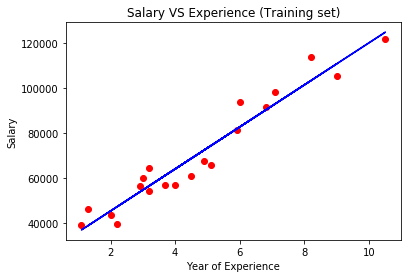

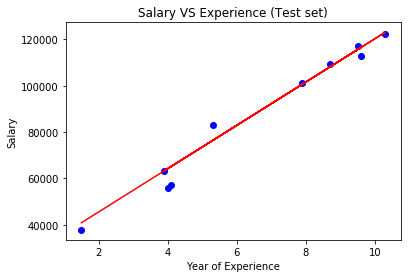

In [17]:
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='blue')
viz_test.plot(X_test, regressor.predict(X_test), color='red')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

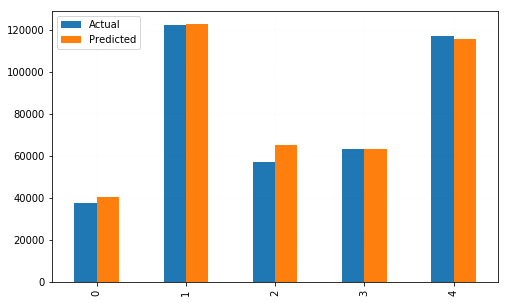

In [23]:
df1 = df_result.head()
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.015', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.015', color='black')
plt.show()

Bar graph showing the comparison of Actual and Predicted values.

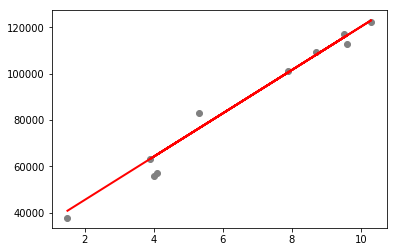

In [31]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct. Strainght line covers most of data points, so it's shows this line is best fit line

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3426.4269374307078
Mean Squared Error: 21026037.329511296
Root Mean Squared Error: 4585.4157204675885


You can see that the value of root mean squared error is 4585, which is less than 10% of the mean value of the percentages of all the salary i.e. 76003. This means that our algorithm did a decent job.

In [28]:
value = [10] #Pass the value for which you want to get the salary prediction
y_pred_single = regressor.predict([value])
print(y_pred_single)

[120275.61667525]
